In [1]:
# 第一次在 Google Colab/Jupyter Notebook 執行請安裝 AutoKeras

!pip3 install autokeras

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


In [2]:
# 若第一次在本機使用 Jupyter Notebook, 移除下一行的 # 號並執行之
# (Windows 使用者也得先安裝 https://graphviz.org/download/#windows)

#!pip3 install pydot pydot-ng pydotplus graphviz

# 安裝完成後重啟 Python kernel (Kernel -> Restart)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import autokeras as ak

In [4]:
# 資料集來源：
# https://www.kaggle.com/nisargchodavadiya/imdb-movie-reviews-with-ratings-50k?select=imdb_sup.csv

df = pd.read_csv('https://github.com/alankrantas/IMDB-movie-reviews-with-ratings_dataset/raw/main/imdb_sup.csv')
df

,Review,Rating,Sentiment
0,"Kurt Russell's chameleon-like performance, cou...",10,1
1,It was extremely low budget(it some scenes it ...,8,1
2,James Cagney is best known for his tough chara...,8,1
3,"Following the brilliant ""Goyôkiba"" (aka. ""Hanz...",8,1
4,One of the last classics of the French New Wav...,10,1
...,...,...,...
49995,(spoiler) it could be the one the worst movie ...,4,0
49996,"So, you've seen the Romero movies, yes? And yo...",1,0
49997,Just listen to the Broadway cast album and to ...,3,0
49998,I have been a fan of the Carpenters for a long...,3,0


In [5]:
x = df['Review'].to_numpy()
y = df['Rating'].to_numpy()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

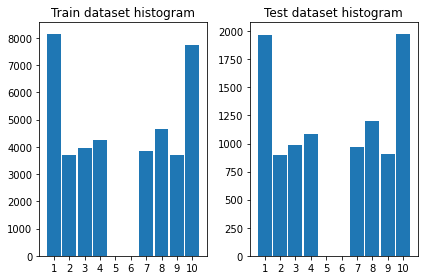

In [6]:
fig = plt.figure()
bin = np.arange(11) + 1

ax = fig.add_subplot(1, 2, 1)
ax.set_xticks(bin)
plt.hist(y_train, bins=bin-0.5, rwidth=0.9)
ax.set_title('Train dataset histogram')

ax = fig.add_subplot(1, 2, 2)
ax.set_xticks(bin)
plt.hist(y_test, bins=bin-0.5, rwidth=0.9)
ax.set_title('Test dataset histogram')

plt.tight_layout()
plt.show()

In [7]:
cbs = [
    tf.keras.callbacks.EarlyStopping(patience=5)
]

#reg = ak.TextRegressor(max_trials=15)

input_node = ak.TextInput()
output_node = ak.TextBlock(block_type='ngram', max_tokens=50000)(input_node)
output_node = ak.RegressionHead()(output_node)

reg = ak.AutoModel(inputs=input_node, outputs=output_node, max_trials=15, overwrite=True)
reg.fit(x_train, y_train, callbacks=cbs, batch_size=50)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
1                 |?                 |text_block_1/text_to_ngram_vector_1/ngrams
False             |?                 |text_block_1/dense_block_1/use_batchnorm
2                 |?                 |text_block_1/dense_block_1/num_layers
32                |?                 |text_block_1/dense_block_1/units_0
0                 |?                 |text_block_1/dense_block_1/dropout
32                |?                 |text_block_1/dense_block_1/units_1
0                 |?                 |regression_head_1/dropout
adam              |?                 |optimizer
0.001             |?                 |learning_rate

Epoch 1/1000
640/640 [==============================] - 67s 102ms/step - loss: 10.4026 - mean_squared_error: 10.4026 - val_loss: 6.7246 - val_mean_squared_error: 6.7246
Epoch 2/1000
640/640 [==============================] - ETA: 0s - loss: 3.3800 - mean_squared_error: 3.3800

: 

: 

In [ ]:
reg.evaluate(x_test, y_test)

In [ ]:
predicted = reg.predict(x_test[:10]).flatten()

for i in range(10):
    print('Review:', x_test[i][:100], '...')
    print('Predict:', predicted[i].round(3))
    print('Real:', y_test[i])
    print('')

In [ ]:
model = reg.export_model()
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)